In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


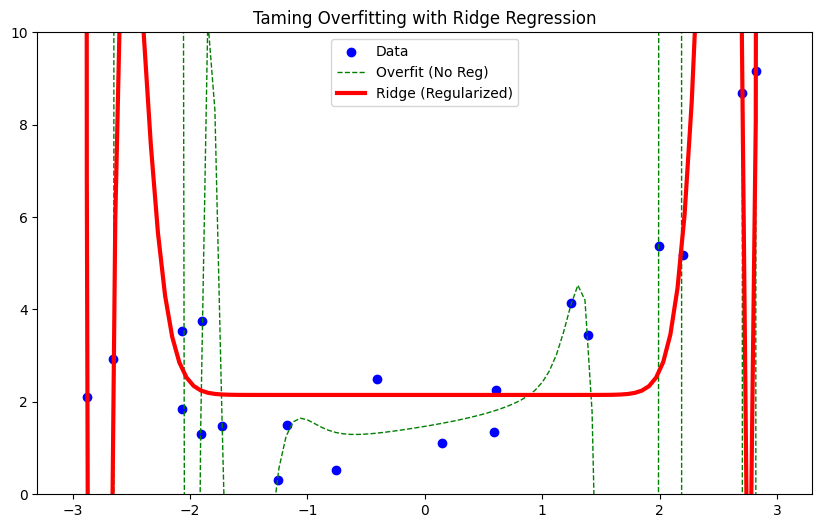

In [2]:
# 1. Use the same non-linear data
np.random.seed(42)
X = 6 * np.random.rand(20, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(20, 1)

# 2. Create Test Data for plotting
X_test = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# 3. Compare Models
# A: Standard Linear Regression with Degree 30 (Chaos)
model_overfit = make_pipeline(PolynomialFeatures(30), LinearRegression())
model_overfit.fit(X, y)
plt.plot(X_test, model_overfit.predict(X_test), 'g--', linewidth=1, label='Overfit (No Reg)')

# B: Ridge Regression with Degree 30 (Controlled)
# alpha is the strength of regularization (often called lambda in math)
model_ridge = make_pipeline(PolynomialFeatures(30), Ridge(alpha=1, random_state=42))
model_ridge.fit(X, y)
plt.plot(X_test, model_ridge.predict(X_test), 'r-', linewidth=3, label='Ridge (Regularized)')

plt.title("Taming Overfitting with Ridge Regression")
plt.ylim(0, 10) # Zoom in
plt.legend()
plt.show()

### Regularization Techniques in Regression

#### 1. Ridge Regression (L2 Regularization)
- **Penalty:** Adds the squared value of the weights  
- **Effect:** Shrinks all weights toward zero, but **never exactly to zero**
- **Use Case:**  
  - When you want to keep **all features**
  - Useful for reducing the overall impact of features and handling multicollinearity

#### 2. Lasso Regression (L1 Regularization)
- **Penalty:** Adds the absolute value of the weights  
- **Effect:** Can shrink some weights **exactly to zero**
- **Use Case:**  
  - **Feature selection**
  - Automatically removes useless features by setting their weights to **0**


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


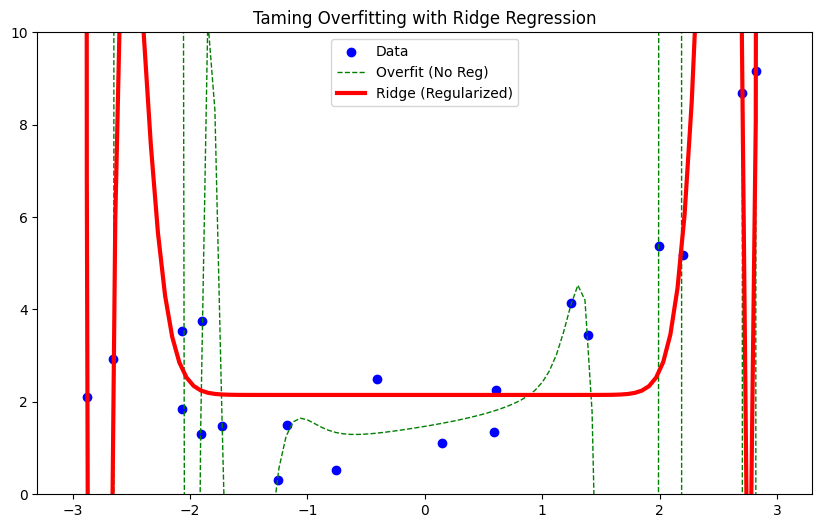

In [3]:
# 1. Use the same non-linear data
np.random.seed(42)
X = 6 * np.random.rand(20, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(20, 1)

# 2. Create Test Data for plotting
X_test = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# 3. Compare Models
# A: Standard Linear Regression with Degree 30 (Chaos)
model_overfit = make_pipeline(PolynomialFeatures(30), LinearRegression())
model_overfit.fit(X, y)
plt.plot(X_test, model_overfit.predict(X_test), 'g--', linewidth=1, label='Overfit (No Reg)')

# B: Ridge Regression with Degree 30 (Controlled)
# alpha is the strength of regularization (often called lambda in math)
model_ridge = make_pipeline(PolynomialFeatures(30), Ridge(alpha=100, random_state=42))
model_ridge.fit(X, y)
plt.plot(X_test, model_ridge.predict(X_test), 'r-', linewidth=3, label='Ridge (Regularized)')

plt.title("Taming Overfitting with Ridge Regression")
plt.ylim(0, 10) # Zoom in
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


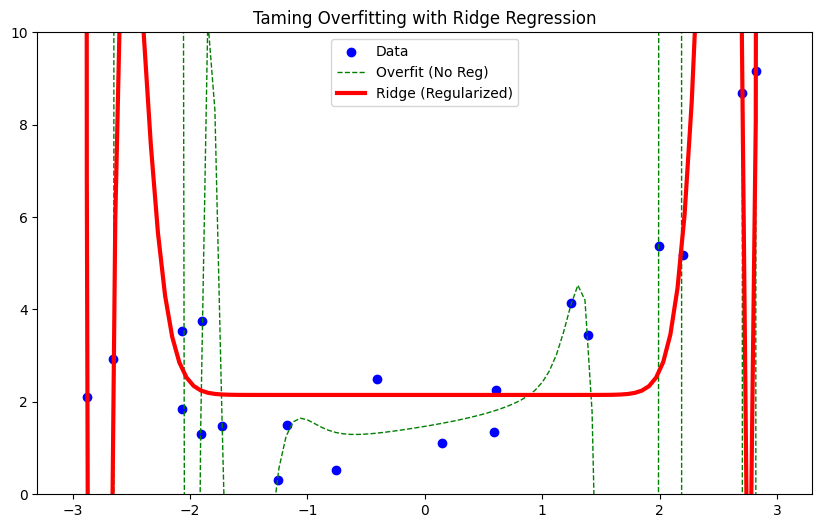

In [4]:
# 1. Use the same non-linear data
np.random.seed(42)
X = 6 * np.random.rand(20, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(20, 1)

# 2. Create Test Data for plotting
X_test = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# 3. Compare Models
# A: Standard Linear Regression with Degree 30 (Chaos)
model_overfit = make_pipeline(PolynomialFeatures(30), LinearRegression())
model_overfit.fit(X, y)
plt.plot(X_test, model_overfit.predict(X_test), 'g--', linewidth=1, label='Overfit (No Reg)')

# B: Ridge Regression with Degree 30 (Controlled)
# alpha is the strength of regularization (often called lambda in math)
model_ridge = make_pipeline(PolynomialFeatures(30), Ridge(alpha=0.001, random_state=42))
model_ridge.fit(X, y)
plt.plot(X_test, model_ridge.predict(X_test), 'r-', linewidth=3, label='Ridge (Regularized)')

plt.title("Taming Overfitting with Ridge Regression")
plt.ylim(0, 10) # Zoom in
plt.legend()
plt.show()

#### ****standard ways to tune α (alpha) for Ridge regression****

Best alpha selected by RidgeCV: 1.384886


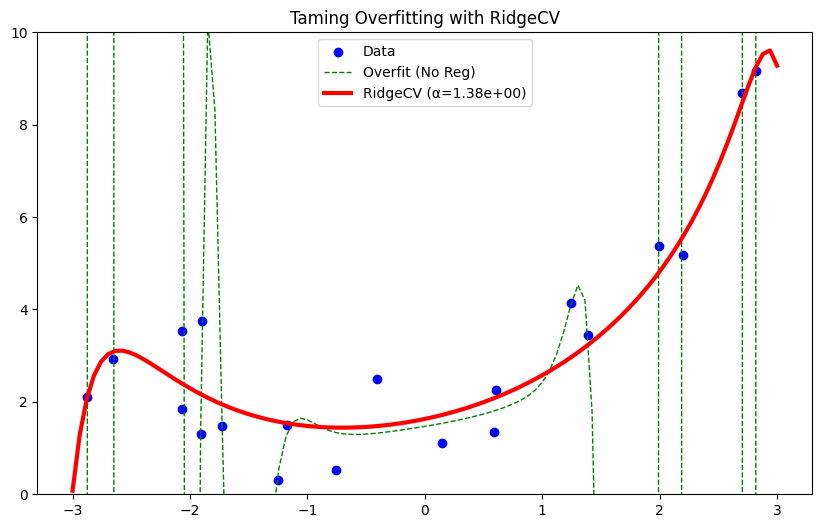

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV

# 1. Use the same non-linear data
np.random.seed(42)
X = 6 * np.random.rand(20, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(20, 1)

# 2. Create Test Data for plotting
X_test = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# 3A. Overfit model: Polynomial Regression (Degree 30, No Regularization)
model_overfit = make_pipeline(
    PolynomialFeatures(30),
    LinearRegression()
)
model_overfit.fit(X, y)

plt.plot(
    X_test,
    model_overfit.predict(X_test),
    'g--',
    linewidth=1,
    label='Overfit (No Reg)'
)

# 3B. Ridge Regression with RidgeCV (Degree 30)
alphas = np.logspace(-6, 2, 100)

model_ridge_cv = make_pipeline(
    PolynomialFeatures(30),
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=5)
)

model_ridge_cv.fit(X, y)

# Extract best alpha
best_alpha = model_ridge_cv.named_steps['ridgecv'].alpha_
print(f"Best alpha selected by RidgeCV: {best_alpha:.6f}")

plt.plot(
    X_test,
    model_ridge_cv.predict(X_test),
    'r-',
    linewidth=3,
    label=f'RidgeCV (α={best_alpha:.2e})'
)

plt.title("Taming Overfitting with RidgeCV")
plt.ylim(0, 10)
plt.legend()
plt.show()
